In [1]:
import logging, matplotlib, os, sys
import anndata
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors

In [2]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3
sc.set_figure_params(dpi=200, dpi_save=300)

In [3]:
adata = sc.read('normed.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 19950 × 18478
    obs: 'replicate', 'type', 'n_genes', 'n_counts', 'batch', 'size_factors'
    var: 'n_cells'
    uns: 'replicate_colors', 'type_colors'
    layers: 'counts'


In [4]:
print('Number of cells: {:d}'.format(adata.n_obs))

Number of cells: 19950


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


<AxesSubplot:>

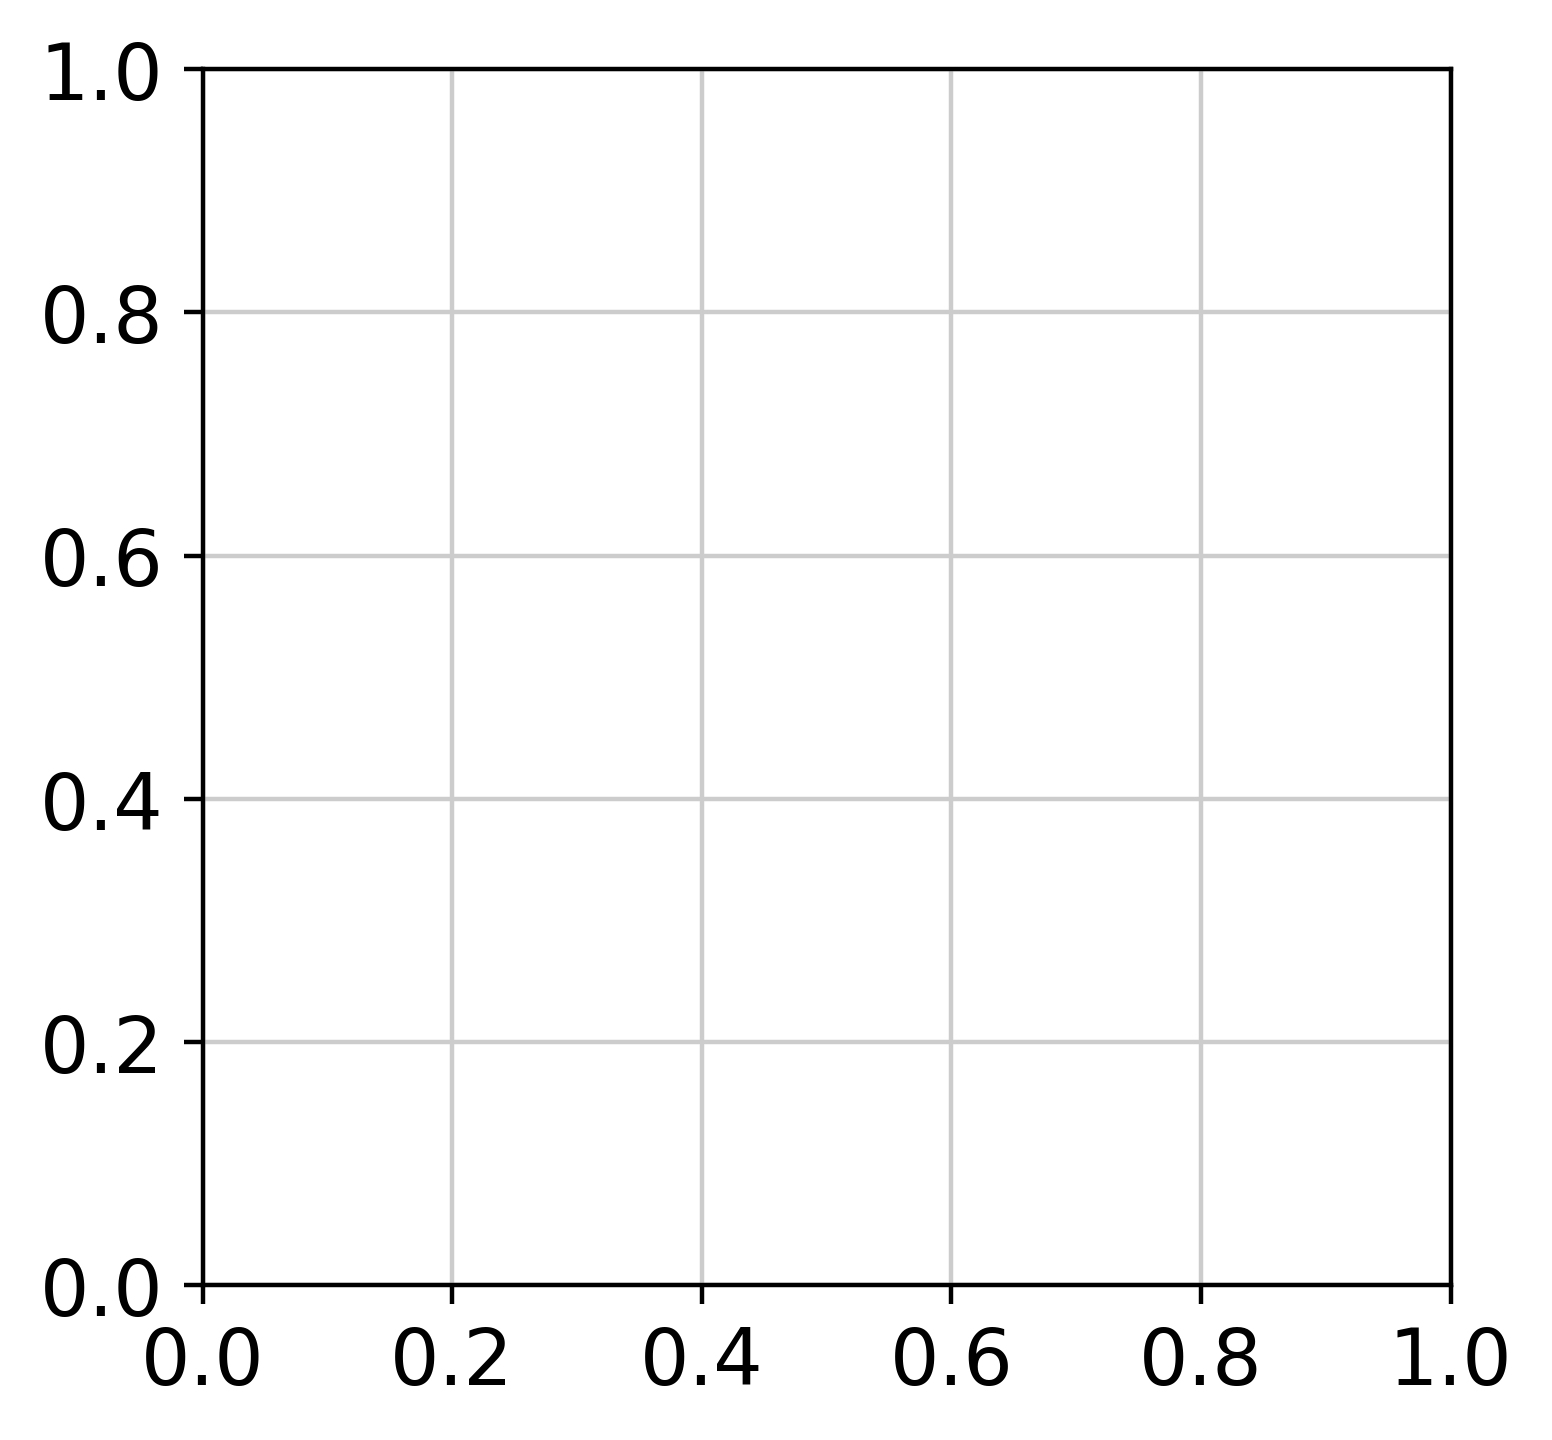

In [5]:
sc.pp.highly_variable_genes(adata, flavor='cell_ranger', n_top_genes=5000)
sc.pl.highly_variable_genes(adata, show=False, save='highly_variable.pdf')

In [6]:
# Calculate the visualizations
sc.pp.pca(adata, n_comps=20, use_highly_variable=True, svd_solver='arpack') # PC=20 from Nature paper
sc.pp.neighbors(adata)
sc.tl.tsne(adata, n_jobs=3) #Note n_jobs works for MulticoreTSNE, but not regular implementation
sc.tl.umap(adata, min_dist=0.5)
#sc.tl.diffmap(adata)

computing PCA
    on highly variable genes
    with n_comps=20
    finished (0:00:20)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:24)
computing tSNE
    using 'X_pca' with n_pcs = 20
    using sklearn.manifold.TSNE


/mnt/e/anaconda3/envs/scte/lib/python3.8/site-packages/scanpy/tools/_tsne.py:113: UserWarning: In previous versions of scanpy, calling tsne with n_jobs > 1 would use MulticoreTSNE. Now this uses the scikit-learn version of TSNE by default. If you'd like the old behaviour (which is deprecated), pass 'use_fast_tsne=True'. Note, MulticoreTSNE is not actually faster anymore.
  warnings.warn(


    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:01:23)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


In [7]:
# PCA plot
sc.pl.pca_variance_ratio(adata, log=True, show=False, save='pca_variance.pdf')

In [8]:
# Perform clustering - using highly variable genes
res = [0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.03]
for r in res:
    sc.tl.leiden(adata, resolution=r, key_added='leiden_r{0:.2f}'.format(r))

running Leiden clustering
    finished: found 9 clusters and added
    'leiden_r0.50', the cluster labels (adata.obs, categorical) (0:00:03)
running Leiden clustering
    finished: found 9 clusters and added
    'leiden_r0.40', the cluster labels (adata.obs, categorical) (0:00:02)
running Leiden clustering
    finished: found 7 clusters and added
    'leiden_r0.30', the cluster labels (adata.obs, categorical) (0:00:02)
running Leiden clustering
    finished: found 6 clusters and added
    'leiden_r0.20', the cluster labels (adata.obs, categorical) (0:00:01)
running Leiden clustering
    finished: found 5 clusters and added
    'leiden_r0.10', the cluster labels (adata.obs, categorical) (0:00:01)
running Leiden clustering
    finished: found 4 clusters and added
    'leiden_r0.05', the cluster labels (adata.obs, categorical) (0:00:01)
running Leiden clustering
    finished: found 4 clusters and added
    'leiden_r0.03', the cluster labels (adata.obs, categorical) (0:00:01)


In [9]:
adata.write('./learned.h5ad')

In [12]:
todraw = ['type', 'replicate'] + ['leiden_r{0:.2f}'.format(r) for r in res]

In [13]:
#Visualize the clustering and how this is reflected by different technical covariates
sc.pl.tsne(adata, color=todraw, size=10, legend_loc='on data', show=False, save='tsne.pdf')
sc.pl.umap(adata, color=todraw, size=10, legend_loc='on data', show=False, save='umap.pdf')

[<AxesSubplot:title={'center':'type'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'replicate'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'leiden_r0.50'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'leiden_r0.40'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'leiden_r0.30'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'leiden_r0.20'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'leiden_r0.10'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'leiden_r0.05'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'leiden_r0.03'}, xlabel='UMAP1', ylabel='UMAP2'>]